# 고양이 스티커 만들기

In [241]:
#필요한 모듈 가져오기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

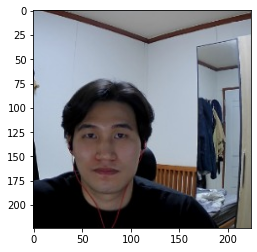

In [242]:
#이미지 가져오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/front.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지 보관
#RGB로 색 바꿔주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(38, 113) (113, 188)]]


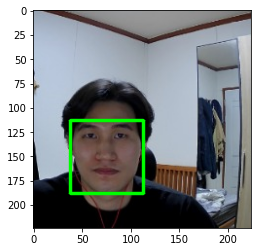

In [243]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


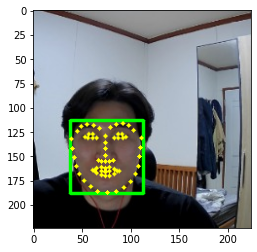

In [244]:
#landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

#face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [245]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(74, 149)
(x,y) : (74,111)
(w,h) : (76,76)


In [246]:
#스티커 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(76, 76, 3)


In [247]:
#스티커 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 10
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (36,118)


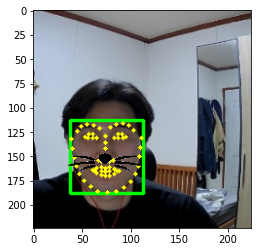

In [248]:
#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

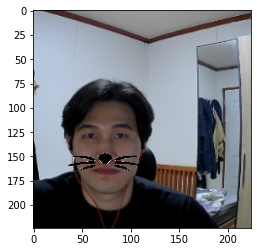

In [249]:
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

## 여러가지 이미지에 적용해보기

### 1. 거리가 먼 이미지

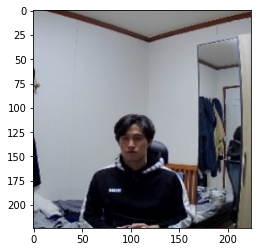

In [250]:
#이미지 가져오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/far.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지 보관
#RGB로 색 바꿔주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(79, 118) (122, 161)]]


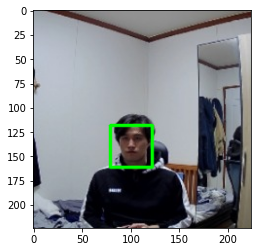

In [251]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


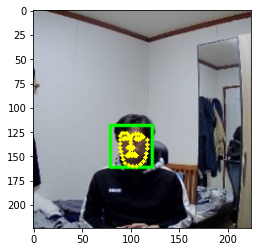

In [252]:
#landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

#face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [253]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(100, 139)
(x,y) : (100,117)
(w,h) : (44,44)


In [254]:
#스티커 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(44, 44, 3)


In [255]:
#스티커 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (78,119)


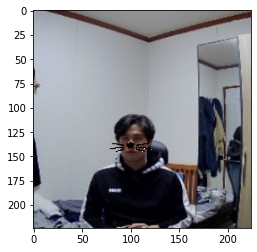

In [256]:
#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

얼굴거리를 조금 더 먼거리에서 찍은 이미지를 적용해보았다.
거리가 꽤나 멀어졌음에도 잘 적용이되었다

### 2. 각도가 다른 이미지

이미지 1(얼굴이 측면으로 움직인 이미지)

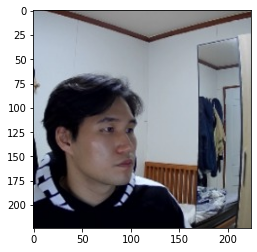

In [257]:
#이미지 가져오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side1.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지 보관
#RGB로 색 바꿔주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(46, 96) (121, 171)]]


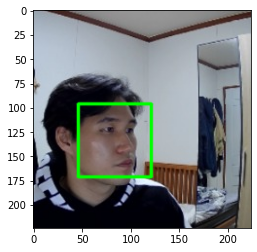

In [258]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


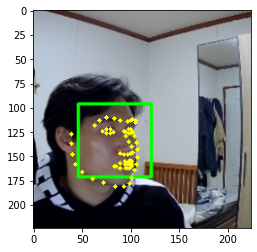

In [259]:
#landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

#face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [260]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(101, 140)
(x,y) : (101,102)
(w,h) : (76,76)


(76, 76, 3)
(x,y) : (63,107)


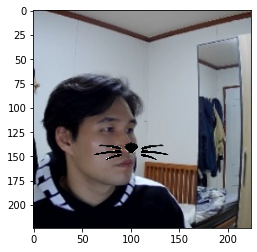

In [261]:
#스티커 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

이미지 2(얼굴이 옆으로 기울어진 이미지)

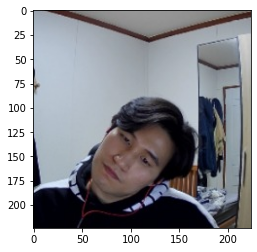

In [262]:
#이미지 가져오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side2.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지 보관
#RGB로 색 바꿔주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(55, 121) (129, 196)]]


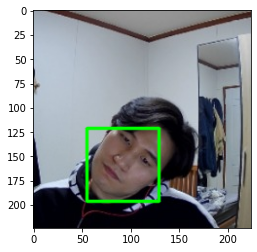

In [263]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


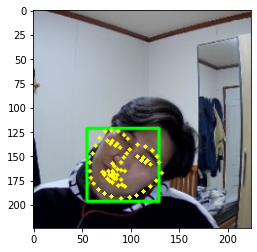

In [264]:
#landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

#face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [265]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(90, 156)
(x,y) : (90,118)
(w,h) : (75,75)


(75, 75, 3)
(x,y) : (53,123)


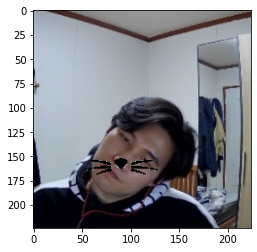

In [266]:
#스티커 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

각도에 따른 얼굴 이미지는 두가지를 해보았다.

첫번째는 얼굴이 측면으로 갔을때다.
랜드마크와 바운딩 박스 모두 잘 인식이 되었다.

두번째는 얼굴이 기울어져있을때다.
랜드마크와 바운딩 박스 모두 잘 인식이 되긴했다.
하지만 고양이 스티커는 같이 기울여지지 않았다.

그리고 한쪽눈이 아예 나오지 않을정도로 고개를 꺽은 이미지도 해보았다.
바운딩 박스조차 인식을 하지못해 코드를 빼냈다.

### 3.모자를 썼을때

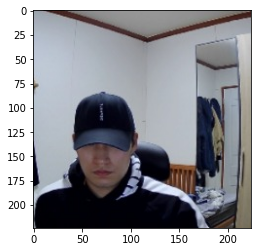

In [267]:
#이미지 가져오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cap.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지 보관
#RGB로 색 바꿔주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(38, 129) (100, 191)]]


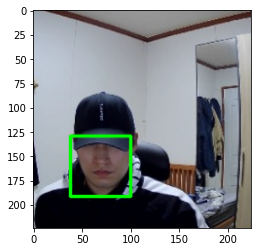

In [268]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


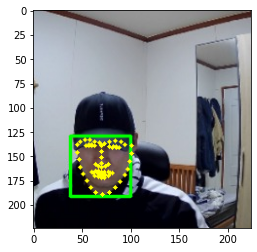

In [269]:
#landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

#face landmark 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [270]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(70, 157)
(x,y) : (70,126)
(w,h) : (63,63)


(63, 63, 3)
(x,y) : (39,130)


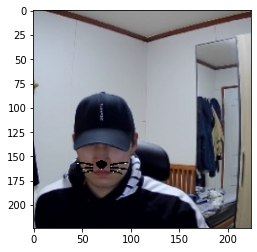

In [271]:
#스티커 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

모자를 쓰고있는 이미지를 넣어봤다.
의도적으로 눈이 거의 안나오게 찍은 이미지였는데도 랜드마크는 잘 인식을 해냈다.
눈이 잘 안나와도 얼굴의 윤곽, 코, 입으로 랜드마크를 잘 잡아내는 것 같다.

어느정도가 되어야 인식이 안되는지 확인하고 싶어서 얼굴의 반이 가려질 정도로 찍으니 인식을 하지 못하였다.

---

## 회고

얼굴이 작게 나왔을때, 얼굴의 각도가 달라졌을 때 그리고 얼굴이 어느정도 가려졌을때 이 세가지 상황에서 랜드마크와 바운딩 박스를 잘 인식하는지 시도해보았다.
생각보다 후하게? 인식하는것 같다.

얼굴의 각도를 기울였을때 스티커는 같이 돌아가지 않았다. 스티커를 기울이는 방법을 찾아봤어야 했는데 회고를 작성하려고 코드를 다시보니 그 생각이 들었다. 나중에 찾아봐야겠다.

지난번 익스에서도 남았던 아쉬움이지만 코드를 좀 더 간결하게 할 수는 없었을까 라는 생각이 든다. 일단 완성시키고 나면 끝났다라는 안도감에 다른것을 공부하다가 코드를 간결하게 하는 과정을 생략해버리고 제출을 한다. 다음익스때에는 그 과정을 꼭 해봐야겠다.

